# <center>20DS616- Computer Networks and IoT</center>
## <center>Term Project</center>
## <center> P Aditya Krishna Rohit [CB.EN.P2CEN20002]</center>
## <center> Rahesh.R [CB.EN.P2CEN20021]</center>

## Objective
To create a model for Gesture classification and quantize it using TinyML. Compare the results of th quantized models with original model.

In [59]:
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pathlib

In [9]:
train_path = "FInal_BW/train"
test_path = "Final_BW/test"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  seed=42,
  image_size=(224,224),
  batch_size=64,
  color_mode = 'grayscale',
  validation_split=0.1,
  subset="training")

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  seed=42,
  image_size=(224,224),
  batch_size=64,
  color_mode = 'grayscale',
  validation_split=0.1,
  subset="validation")

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  seed=42,
  image_size=(224,224),
  color_mode = 'grayscale',
  batch_size = 64 )

Found 33242 files belonging to 4 classes.
Using 29918 files for training.
Found 33242 files belonging to 4 classes.
Using 3324 files for validation.
Found 582 files belonging to 4 classes.


### Datset Used
+ Rock paper scissors datasset -Kaggle https://www.kaggle.com/drgfreeman/rockpaperscissors , https://www.kaggle.com/roobansappani/hand-gesture-recognition
+ Our dataset - Captured using webcam

### Total images (training)
+ 0 - NOTHING - 8334
+ 1 - ROCK - 8393
+ 2 - PAPER - 8422
+ 3 - SCISSORS - 8093

### Total images for Testing
+ N - 149
+ R - 150
+ P - 150
+ S - 133

In [10]:
train_ds.class_names

['nothing', 'paper', 'rock', 'scissors']

* Sample images for Rock, Paper and Scissor

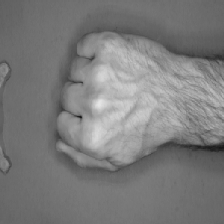

In [82]:
from IPython.display import Image
Image(filename='Final_BW/train/rock/rock_2.png') 

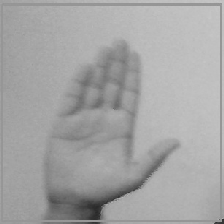

In [83]:
Image(filename='Final_BW/train/paper/paper_39.png') 

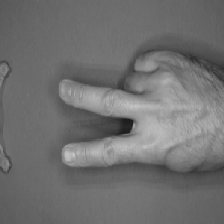

In [85]:
Image(filename='Final_BW/train/scissors/scissors_5.png') 

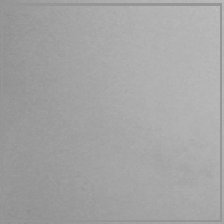

In [88]:
Image(filename='Final_BW/train/nothing/nothing_7000.png') 

#### Now let's build a model and train

In [11]:
import keras
import matplotlib.pyplot as plt
#from tensorflow.keras.applications import VGG16
#from keras_squeezenet import SqueezeNet
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout

In [12]:
model1 = Sequential()
model1.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (224,224,1)))
model1.add(MaxPool2D(2))
model1.add(Dropout(0.5))
model1.add(Conv2D(32, (3,3), activation = 'relu'))
model1.add(Conv2D(16, (3,3), activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(4, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 16)      4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 106, 106, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 179776)            0

### <center> Model Architecture </center>
<center> <img src = 'model1.png'  style="width:100px;height:600px;"> </center>

In [19]:
# Compile the model
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

#### Train the model with 10 epochs and batch size as 256

In [20]:
his1 = model1.fit(train_ds, validation_data = valid_ds, epochs=10, batch_size = 256)

Epoch 1/10
468/468 [==============================] - 396s 844ms/step - loss: 1.3127 - accuracy: 0.3616 - val_loss: 0.9951 - val_accuracy: 0.5782
Epoch 2/10
468/468 [==============================] - 94s 200ms/step - loss: 0.9442 - accuracy: 0.5872 - val_loss: 0.6719 - val_accuracy: 0.7377
Epoch 3/10
468/468 [==============================] - 78s 166ms/step - loss: 0.7066 - accuracy: 0.7134 - val_loss: 0.5538 - val_accuracy: 0.7930
Epoch 4/10
468/468 [==============================] - 78s 167ms/step - loss: 0.6639 - accuracy: 0.7329 - val_loss: 0.5427 - val_accuracy: 0.8111
Epoch 5/10
468/468 [==============================] - 78s 167ms/step - loss: 0.5282 - accuracy: 0.7988 - val_loss: 0.5212 - val_accuracy: 0.8276
Epoch 6/10
468/468 [==============================] - 79s 168ms/step - loss: 0.4369 - accuracy: 0.8343 - val_loss: 0.5321 - val_accuracy: 0.8234
Epoch 7/10
468/468 [==============================] - 79s 168ms/step - loss: 0.4012 - accuracy: 0.8483 - val_loss: 0.6150 - val_a

* Accuracy and loss graph

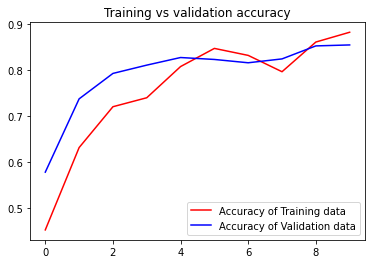

<Figure size 432x288 with 0 Axes>

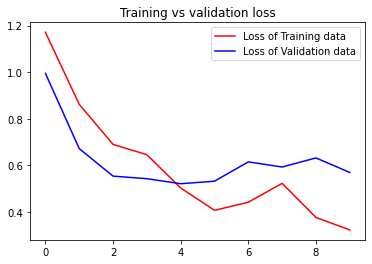

<Figure size 432x288 with 0 Axes>

In [21]:
get_acc = his1.history['accuracy']
value_acc = his1.history['val_accuracy']
get_loss = his1.history['loss']
validation_loss = his1.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [22]:
X_test = []
y_test = []
for i,j in list(test_ds):

    X_test = itertools.chain(X_test, i.numpy())

    y_test = np.append(y_test, np.array(j), axis = -1)
X_test = np.array(list(X_test))
y_test = np.array(y_test)
X_test.shape, y_test.shape

((582, 224, 224, 1), (582,))

In [23]:
import gc
gc.collect()
y_pred = model1.predict(X_test)

In [24]:
ypred = np.argmax(y_pred, axis = 1)
ypred.shape

(582,)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, ypred)

0.8951890034364262

In [26]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       149
         1.0       1.00      1.00      1.00       150
         2.0       0.97      0.61      0.75       150
         3.0       0.69      0.98      0.81       133

    accuracy                           0.90       582
   macro avg       0.91      0.90      0.89       582
weighted avg       0.92      0.90      0.89       582



In [37]:
model1.save('model1.h5')

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpr42w98o0\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpr42w98o0\assets


In [91]:
model = load_model('model1.h5')

In [202]:
test_images = X_test[0:10]
test_labels = y_test[0:10]

In [144]:
# convert using dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant = converter.convert()
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

dynamic_range = converter.convert()

dyn_range = pathlib.Path('dynamic_range.tflite')
dyn_range.write_bytes(dynamic_range)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp9x5wm1n0\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp9x5wm1n0\assets


input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>
INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpclyr17xf\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpclyr17xf\assets


741056

### <center> Dynamic Range Quantized Architecture </center>
<center> <img src = 'dynamic_range.png'  style="width:170px;height:700px;"> </center>

In [66]:
# convert using integer-only quantization
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(100):
         yield [tf.dtypes.cast(input_value, tf.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] # DEFAULT option is used for Integer quantization
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
integer_only = converter.convert()

int_only = pathlib.Path('integer_only.tflite')
int_only.write_bytes(integer_only)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmphmz7mjys\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmphmz7mjys\assets


740128

### <center> Integer only Architecture </center>
<center> <img src = 'integer_only.png'  style="width:170px;height:700px;"> </center>

In [190]:
# convert using float 16 quantization
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
converter.representative_dataset = representative_data_gen

float_quant = converter.convert()

fl_only = pathlib.Path('float_quant.tflite')
fl_only.write_bytes(float_quant)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpamr8v3rh\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpamr8v3rh\assets


1472336

### <center> Float Quantized Architecture </center>
<center> <img src = 'float_quant.png'  style="width:500px;height:800px;"> </center>

In [234]:
interpreter = tf.lite.Interpreter(model_path=str(int_only))
for i in interpreter.get_tensor_details():
    print(i['dtype'])

<class 'numpy.uint8'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.uint8'>


In [235]:
interpreter = tf.lite.Interpreter(model_path=str(fl_only))
for i in interpreter.get_tensor_details():
    print(i['dtype'])

<class 'numpy.float32'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.float16'>
<class 'numpy.int32'>
<class 'numpy.float16'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>


In [238]:
interpreter = tf.lite.Interpreter(model_path=str(dyn_range))
for i in interpreter.get_tensor_details():
    print(i['dtype'])

<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.int8'>
<class 'numpy.int8'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.int32'>
<class 'numpy.int8'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>


In [203]:
# run the TensorFlow Lite models
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices):
    global test_images

  # Initialize the interpreter
    interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    predictions = np.zeros((len(test_image_indices),), dtype=int)
    for i, test_image_index in enumerate(test_image_indices):
        test_image = test_images[test_image_index]
        test_label = test_labels[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
        if input_details['dtype'] == np.uint8:
            input_scale, input_zero_point = input_details["quantization"]
            test_image = test_image / input_scale 

        test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
        interpreter.set_tensor(input_details["index"], test_image)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details["index"])[0]

        predictions[i] = output.argmax()

    return predictions

In [204]:
# evaluate the models on all images
def evaluate_model(tflite_file, model_type):
    global test_images
    global test_labels

    test_image_indices = range(0,test_images.shape[0])
    predictions = run_tflite_model(tflite_file, test_image_indices)

    accuracy = (np.sum(test_labels== predictions) * 100) / len(test_images)

    print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(test_images)))

In [205]:
evaluate_model(int_only, model_type="Int")

Int model accuracy is 90.0000% (Number of test samples=10)


In [206]:
evaluate_model(fl_only, model_type="Float")

Float model accuracy is 90.0000% (Number of test samples=10)


In [207]:
evaluate_model(dyn_range, model_type="Dynamic")

Dynamic model accuracy is 90.0000% (Number of test samples=10)


* Now let us compare each model
<center> <img src = 'comparision.png'></center>
<center> table 1. Comparision

### Conclusion


* Based on the experiments done, Float 16 Quantization took less time for testing the data than Integer Quantization
* And All the quantized models are performing with same accuracy as the original model. We can deploy these models in Embedded devices since the sizes of the quantized models are reduced( Above table1. )